<a href="https://colab.research.google.com/github/ibrahim-lepro/web3D-idtw/blob/main/acp_python_Exercice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercice3 : ACP sur les données « feuilles »**

In [3]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA

In [7]:
noms = np.genfromtxt('leaf.csv', dtype='str', delimiter=';', usecols=[0], skip_header=1)

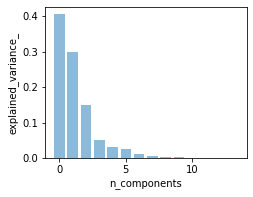

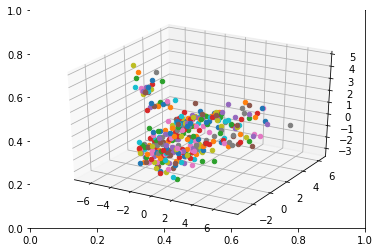

In [8]:
leaf = np.loadtxt('leaf.csv', delimiter=',')

# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
# On ignore les deux premières colonnes qui sont l'espèce et le numéro d'espèce (nominal)
from sklearn import preprocessing
leafN = preprocessing.scale(leaf[:,2:])

pca = PCA()
pca.fit(leafN)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

leafMT = pca.transform(leafN)
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(noms)):
    x, y, z = leafMT[i, 0], leafMT[i, 1], leafMT[i, 2]
    ax.scatter(x, y, z)

    
plt.show()

Affichons les projections des données sur les 3 premiers axes principaux en utilisant l’étiquette de classe pour donner une couleur aux marques.

4


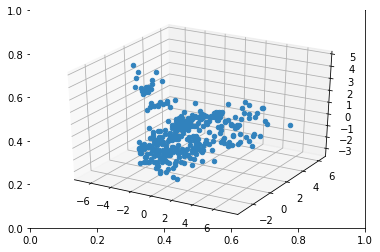

In [9]:
classes = np.loadtxt('leaf.csv', dtype=int, delimiter=',', usecols = [1])

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
colors = plt.get_cmap('tab20c')
print(classes[3])
for i in range(len(noms)):
    x, y, z = leafMT[i, 0], leafMT[i, 1], leafMT[i, 2]
    ax.scatter(x, y, z, c=classes[i], cmap=colors)

    
plt.show()

In [10]:
print(plt.get_cmap('tab20c')[0])